# Multilayer Perceptron from MNIST raw data using Keras

This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

We assume you are using TF 2.

## Loading the packages

In [1]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [2]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils

%matplotlib inline

ModuleNotFoundError: No module named 'sklearn'

## Loading the raw data
Keras provides easy access to different datasets including MNIST. First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [3]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

show_imgs(X_train)

NameError: name 'mnist' is not defined

In [4]:
X_train =  X_train.reshape(60000, 784)
X_test =   X_test.reshape(10000, 784)
X_train =  X_train.astype('float32')
X_test =   X_test.astype('float32')
X_train /= 255.0
X_test /=  255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [5]:
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# One-layer network and weight visualisation
## Define the network

In [10]:
E = 10                # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

model = Sequential([
    Dense(units=n_classes, input_shape=(D,), activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [11]:
# ... compile the model with a crossentropy loss, rmsprop optimizer 
#      and defining metrics to be stored as history of the training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data
log = model.fit(X_train, Y_train, epochs=E, batch_size=B, validation_data=(X_test, Y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.6064 - accuracy: 0.8489 - val_loss: 0.3444 - val_accuracy: 0.9086
Epoch 2/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.3303 - accuracy: 0.9083 - val_loss: 0.3012 - val_accuracy: 0.9157
Epoch 3/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.3013 - accuracy: 0.9154 - val_loss: 0.2863 - val_accuracy: 0.9210
Epoch 4/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.2883 - accuracy: 0.9195 - val_loss: 0.2811 - val_accuracy: 0.9217
Epoch 5/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2800 - accuracy: 0.9220 - val_loss: 0.2748 - val_accuracy: 0.9240
Epoch 6/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2743 - accuracy: 0.9237 - val_loss: 0.2740 - val_accuracy: 0.9237
Epoch 7/10
60000/60000 [==============================] 

In [12]:
# Evaluate the network

# We can do this at three levels: 
# (1) plot of the loss during the training phase 
# (2) overall accuracy evaluation on test set
# (3) per class evaluation with confusion matrix on test set.
# Loss evolution during training
# This can be done first looking at the history of the training (output of the `fit()` function).

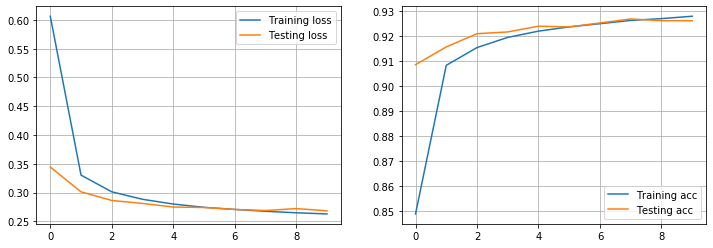

In [13]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [14]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.26825882982611654
Test accuracy: 0.9262


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [15]:
pred = model.predict_classes(X_test, verbose=0)
confusion_matrix(y_test, pred)

array([[ 960,    0,    2,    2,    0,    5,    6,    2,    2,    1],
       [   0, 1107,    4,    2,    0,    1,    4,    2,   15,    0],
       [   3,    6,  933,   13,    7,    3,   11,   10,   43,    3],
       [   2,    0,   23,  915,    0,   26,    2,   13,   24,    5],
       [   2,    1,    8,    1,  908,    0,    7,    6,   11,   38],
       [   8,    3,    5,   32,    7,  775,   11,    6,   38,    7],
       [  10,    3,   10,    1,    7,   15,  906,    2,    4,    0],
       [   1,    6,   22,    6,    5,    0,    0,  957,    5,   26],
       [   5,    6,    7,   18,    9,   19,    8,   12,  886,    4],
       [  10,    7,    1,   11,   24,    5,    0,   27,    9,  915]])

### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(784, 10)
(10,)


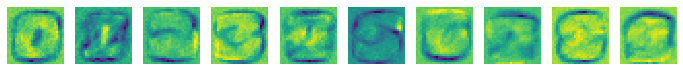

In [16]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:, i]
    im = im.reshape(28, 28)
    
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    minv = im.min()
    maxv = im.max()
    im = (im - minv) / (maxv - minv) * 255
    im = im.round().astype(int)
    ax.axis('off')
    ax.imshow(im)